Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 9s


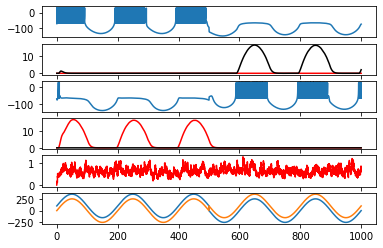

In [3]:
from brian2 import *
import random
import numpy as np 
import matplotlib.pyplot as plt
import time


#this is a dimensional form of Izhi neurons

defaultclock.dt =0.01*ms
div=defaultclock.dt
duration =1000*ms
num_neurons=1
tau_ampa=5.0*ms
tau_gaba=5.0*ms
taupois=3*ms
g_synpk=0.45
g_synmaxval=(g_synpk/(tau_ampa/ms*exp(-1)))
stimfreq=5.0
lf=numpy.arange(0,duration/ms,div/ms)*ms
Nmax=len(lf)

#G=0*numpy.sin(stimfreq*Hz*2*pi*lf)
#G=1*numpy.sin(stimfreq*Hz*2*pi*lf)

#A1=TimedArray(G,dt=1.*defaultclock.dt)
#I=A1
#I = 1250 

G=250*numpy.sin(stimfreq*Hz*2*pi*lf)
lf=numpy.arange(0,duration/ms,div/ms)*ms
G1 = []
G2 = []
factor=100
for i in range(Nmax):
    if i < Nmax/2:
        G1.append(G[i] + factor)
        G2.append(G[i])
    else:    
        G1.append(G[i])
        G2.append(G[i] + factor)

A1=TimedArray(G1,dt=1.*defaultclock.dt)
A2=TimedArray(G2,dt=1.*defaultclock.dt) 

I=A1
eqs = '''
dv/dt = (0.04*v**2+5*v +140 -u + g_gaba2*(-80.0-v) + g_gaba*(-80-v) +I(t))/ms : 1
du/dt = a*(b*(v) - u)/ms : 1
dg_gaba2/dt = -g_gaba2/tau_ampa +z/ms : 1
dz/dt=-z/tau_ampa :1
dg_gaba/dt = -g_gaba/tau_gaba +z1/ms : 1
dz1/dt=-z1/tau_gaba :1
dgsynpois/dt=-gsynpois/taupois :1
a : 1
b : 1
c : 1
d : 1
'''

I2=A2
eqs2 = '''
dv/dt = (0.04*v**2+5*v +140 -u + g_gaba2*(-80.0-v) + g_gaba*(-80-v) + I2(t))/ms : 1
du/dt = a*(b*(v) - u)/ms : 1
dg_gaba2/dt = -g_gaba2/tau_ampa +z/ms : 1
dz/dt=-z/tau_ampa :1
dg_gaba/dt = -g_gaba/tau_gaba +z1/ms : 1
dz1/dt=-z1/tau_gaba :1
dgsynpois/dt=-gsynpois/taupois :1
a : 1
b : 1
c : 1
d : 1
'''

# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(num_neurons, eqs, method='euler',threshold = 'v >= 30', reset = '''
	v = c
	u = u + d 
''')

group1 = NeuronGroup(num_neurons, eqs2, method='euler',threshold = 'v >= 30', reset = '''
	v = c
	u = u + d 
''')

group2 = NeuronGroup(num_neurons, eqs, method='euler',threshold = 'v >= 30', reset = '''
	v = c
	u = u + d 
''')

#Regular Spiking
group.a = 0.02
group.b = 0.25
group.c = -65
group.d = 2
group.v=-70

group1.a = 0.02
group1.b = 0.25
group1.c = -65
group1.d = 2
group1.v=-70



Sr = Synapses(group, group1, clock=group.clock,model='''
                g_synmax:1
                ''',
		on_pre='''
		z+= g_synmax
		''')
                            
                                                                                                   
Sr.connect(i=[0],j=[0])
Sr.g_synmax=g_synmaxval
Sr.delay=5*ms #introduces a fixed delay between the firing of the pre cell  and the postsynaptic response

Sr1 = Synapses(group1, group, clock=group.clock,model='''
                g_synmax:1
                ''',
		on_pre='''
		z1+= g_synmax
		''')
                            
                                                                                                   
Sr1.connect(i=[0],j=[0])
Sr1.g_synmax=g_synmaxval
Sr1.delay=2*ms #introduces a fixed delay between the firing of the pre cell  and the postsynaptic response


M = StateMonitor(group,('v','g_gaba2','g_gaba','gsynpois'),record=True)
M1 = StateMonitor(group1,('v','g_gaba2','g_gaba'),record=True)

wePY=.07
wePY=.07

ne=100
pois6 = PoissonInput(group, 'gsynpois', N=ne, rate=30*Hz, weight=wePY) 
pois7 = PoissonInput(group1, 'gsynpois', N=ne/2, rate=30*Hz, weight=wePY) 


#group.I[0]=0
#group1.I[0]=0 
#run(200*ms,report='text')
#group.I[0]=50
#group1.I[0]=0
#run(20*ms,report='text')
#group.I[0]=0
#group1.I[0]=0


#group.I = A1
#group1.I = A2
run(duration,report='text')

subplot(6,1,1)
plot(M.t/ms, M.v[0])

subplot(6,1,2)
plot(M.t/ms, M.g_gaba2[0],'r')
plot(M.t/ms, M.g_gaba[0],'k')

subplot(6,1,3)
plot(M1.t/ms, M1.v[0])

subplot(6,1,4)
plot(M1.t/ms, M1.g_gaba2[0],'r')
plot(M1.t/ms, M1.g_gaba[0],'k')
subplot(6,1,5)
plot(M.t/ms, M.gsynpois[0],'r')
subplot(6,1,6)
Idata=A1(numpy.arange(0,duration/ms,(div/ms))*ms)
plot((numpy.arange(0,duration/ms,div/ms)),Idata)

Idata=A2(numpy.arange(0,duration/ms,(div/ms))*ms)
plot((numpy.arange(0,duration/ms,div/ms)),Idata)


show()

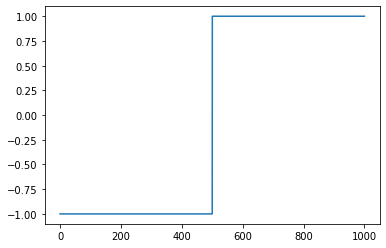

In [15]:
#stdp timedarray
#Idata=A2(numpy.arange(0,duration/ms,(div/ms))*ms)
#plot((numpy.arange(0,duration/ms,div/ms)),Idata)

# tune this to pattern the bug! 
2nd to last plot is the poisson input 
last plot is the external current 

In [2]:
Idata.shape

(100000,)

In [3]:
Idata

array([ 0.,  0.,  0., ..., -0., -0., -0.])

# original stuff

Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 9s


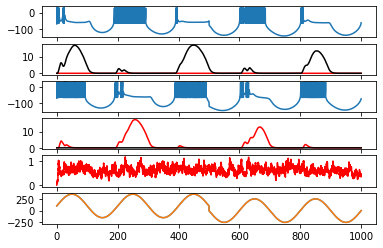

In [4]:
from brian2 import *
import random
import numpy as np 
import matplotlib.pyplot as plt
import time


#this is a dimensional form of Izhi neurons

defaultclock.dt =0.01*ms
div=defaultclock.dt
duration =1000*ms
num_neurons=1
tau_ampa=5.0*ms
tau_gaba=5.0*ms
taupois=3*ms
g_synpk=0.45
g_synmaxval=(g_synpk/(tau_ampa/ms*exp(-1)))
stimfreq=5.0
lf=numpy.arange(0,duration/ms,div/ms)*ms
Nmax=len(lf)

#G=0*numpy.sin(stimfreq*Hz*2*pi*lf)
G=1*numpy.sin(stimfreq*Hz*2*pi*lf)

lf=numpy.arange(0,duration/ms,div/ms)*ms

A1=TimedArray(G1,dt=1.*defaultclock.dt)
I=A1


eqs = '''
dv/dt = (0.04*v**2+5*v +140 -u + g_gaba2*(-80.0-v) + g_gaba*(-80-v) +I(t))/ms : 1
du/dt = a*(b*(v) - u)/ms : 1
dg_gaba2/dt = -g_gaba2/tau_ampa +z/ms : 1
dz/dt=-z/tau_ampa :1
dg_gaba/dt = -g_gaba/tau_gaba +z1/ms : 1
dz1/dt=-z1/tau_gaba :1
dgsynpois/dt=-gsynpois/taupois :1
a : 1
b : 1
c : 1
d : 1
'''

# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(num_neurons, eqs, method='euler',threshold = 'v >= 30', reset = '''
	v = c
	u = u + d 
''')

group1 = NeuronGroup(num_neurons, eqs, method='euler',threshold = 'v >= 30', reset = '''
	v = c
	u = u + d 
''')

#Regular Spiking
group.a = 0.02
group.b = 0.25
group.c = -65
group.d = 2
group.v=-70

group1.a = 0.02
group1.b = 0.25
group1.c = -65
group1.d = 2
group1.v=-70


Sr = Synapses(group, group1, clock=group.clock,model='''
                g_synmax:1
                ''',
		on_pre='''
		z+= g_synmax
		''')
                            
                                                                                                   
Sr.connect(i=[0],j=[0])
Sr.g_synmax=g_synmaxval
Sr.delay=5*ms #introduces a fixed delay between the firing of the pre cell  and the postsynaptic response

Sr1 = Synapses(group1, group, clock=group.clock,model='''
                g_synmax:1
                ''',
		on_pre='''
		z1+= g_synmax
		''')
                            
                                                                                                   
Sr1.connect(i=[0],j=[0])
Sr1.g_synmax=g_synmaxval
Sr1.delay=2*ms #introduces a fixed delay between the firing of the pre cell  and the postsynaptic response


M = StateMonitor(group,('v','g_gaba2','g_gaba','gsynpois'),record=True)
M1 = StateMonitor(group1,('v','g_gaba2','g_gaba'),record=True)

wePY=.07
wePY=.07

ne=100
pois6 = PoissonInput(group, 'gsynpois', N=ne, rate=30*Hz, weight=wePY) 
pois7 = PoissonInput(group1, 'gsynpois', N=ne/2, rate=30*Hz, weight=wePY) 


#group.I[0]=0
#group1.I[0]=0 
#run(200*ms,report='text')
#group.I[0]=50
#group1.I[0]=0
#run(20*ms,report='text')
#group.I[0]=0
#group1.I[0]=0

run(duration,report='text')
subplot(6,1,1)
plot(M.t/ms, M.v[0])

subplot(6,1,2)
plot(M.t/ms, M.g_gaba2[0],'r')
plot(M.t/ms, M.g_gaba[0],'k')

subplot(6,1,3)
plot(M1.t/ms, M1.v[0])

subplot(6,1,4)
plot(M1.t/ms, M1.g_gaba2[0],'r')
plot(M1.t/ms, M1.g_gaba[0],'k')
subplot(6,1,5)
plot(M.t/ms, M.gsynpois[0],'r')
subplot(6,1,6)
Idata=A1(numpy.arange(0,duration/ms,(div/ms))*ms)
plot((numpy.arange(0,duration/ms,div/ms)),Idata)

Idata=A1(numpy.arange(0,duration/ms,(div/ms))*ms)
plot((numpy.arange(0,duration/ms,div/ms)),Idata)


show()

Starting simulation at t=0. s for a duration of 1. s
0.78596 s (78%) simulated in 10s, estimated 3s remaining.
1. s (100%) simulated in 12s


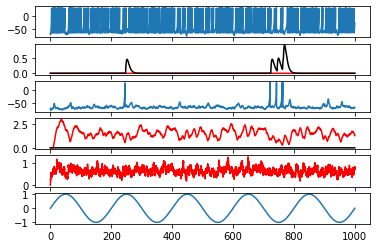

In [10]:
from brian2 import *
import random
import numpy as np 
import matplotlib.pyplot as plt
import time

#this is a dimensional form of Izhi neurons

defaultclock.dt =0.01*ms
div=defaultclock.dt
duration =1000*ms
num_neurons=1
tau_ampa=5.0*ms
tau_gaba=5.0*ms
taupois=3*ms
g_synpk=0.45
g_synmaxval=(g_synpk/(tau_ampa/ms*exp(-1)))
stimfreq=5.0
lf=numpy.arange(0,duration/ms,div/ms)*ms
Nmax=len(lf)

#G=0*numpy.sin(stimfreq*Hz*2*pi*lf)
G=1*numpy.sin(stimfreq*Hz*2*pi*lf)

A1=TimedArray(G,dt=1.*defaultclock.dt)
I=A1

eqs = '''
dv/dt = (0.04*v**2+5*v +140 -u + g_gaba2*(-80.0-v) + g_gaba*(-80-v) + gsynpois*(0.0-v) +I(t))/ms : 1
du/dt = a*(b*(v) - u)/ms : 1
dg_gaba2/dt = -g_gaba2/tau_ampa +z/ms : 1
dz/dt=-z/tau_ampa :1
dg_gaba/dt = -g_gaba/tau_gaba +z1/ms : 1
dz1/dt=-z1/tau_gaba :1
dgsynpois/dt=-gsynpois/taupois :1
a : 1
b : 1
c : 1
d : 1
'''



# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(num_neurons, eqs, method='euler',threshold = 'v >= 30', reset = '''
	v = c
	u = u + d 
''')

group1 = NeuronGroup(num_neurons, eqs, method='euler',threshold = 'v >= 30', reset = '''
	v = c
	u = u + d 
''')

group2 = NeuronGroup(num_neurons, eqs, method='euler',threshold = 'v >= 30', reset = '''
	v = c
	u = u + d 
''')

#Regular Spiking
group.a = 0.02
group.b = 0.25
group.c = -65
group.d = 2
group.v=-70

group1.a = 0.02
group1.b = 0.25
group1.c = -65
group1.d = 2
group1.v=-70



Sr = Synapses(group, group1, clock=group.clock,model='''
                g_synmax:1
                ''',
		on_pre='''
		z+= g_synmax
		''')
                            
                                                                                                   
Sr.connect(i=[0],j=[0])
Sr.g_synmax=g_synmaxval
Sr.delay=5*ms #introduces a fixed delay between the firing of the pre cell  and the postsynaptic response

Sr1 = Synapses(group1, group, clock=group.clock,model='''
                g_synmax:1
                ''',
		on_pre='''
		z1+= g_synmax
		''')
                            
                                                                                                   
Sr1.connect(i=[0],j=[0])
Sr1.g_synmax=g_synmaxval
Sr1.delay=2*ms #introduces a fixed delay between the firing of the pre cell  and the postsynaptic response


M = StateMonitor(group,('v','g_gaba2','g_gaba','gsynpois'),record=True)
M1 = StateMonitor(group1,('v','g_gaba2','g_gaba'),record=True)

wePY=.07
wePY=.07

ne=100
pois6 = PoissonInput(group, 'gsynpois', N=ne, rate=30*Hz, weight=wePY) 
pois7 = PoissonInput(group1, 'gsynpois', N=ne/2, rate=30*Hz, weight=wePY) 


#group.I[0]=0
#group1.I[0]=0 
#run(200*ms,report='text')
#group.I[0]=50
#group1.I[0]=0
#run(20*ms,report='text')
#group.I[0]=0
#group1.I[0]=0
run(duration,report='text')



subplot(6,1,1)
plot(M.t/ms, M.v[0])

subplot(6,1,2)
plot(M.t/ms, M.g_gaba2[0],'r')
plot(M.t/ms, M.g_gaba[0],'k')

subplot(6,1,3)
plot(M1.t/ms, M1.v[0])

subplot(6,1,4)
plot(M1.t/ms, M1.g_gaba2[0],'r')
plot(M1.t/ms, M1.g_gaba[0],'k')
subplot(6,1,5)
plot(M.t/ms, M.gsynpois[0],'r')
subplot(6,1,6)
Idata=I(numpy.arange(0,duration/ms,(div/ms))*ms)
plot((numpy.arange(0,duration/ms,div/ms)),Idata)
show()